# Getting Started with Images

- Reading an image
- Check image attributes like datatype and shape
- Matrix representation of an image in Numpy
- Color Images and splitting/merging image channels
- Displaying images using matplotlib
- Saving images

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)  

Display Image Directly

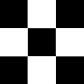

In [15]:
Image(filename="images/black.jpeg")

# Reading images using OpenCV
Flags

- cv2.IMREAD_GRAYSCALE or 0: Loads image in grayscale mode
- cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.
- cv2.IMREAD_UNCHANGED or -1: Loads image as such including alpha channel.

In [16]:
gray_Scale = cv2.imread("images/black.jpeg",0)
gray_Scale

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

 # Display Image attributes

In [17]:
print("The shape of the image",gray_Scale.shape)
print("The data type of the image is",gray_Scale.dtype)

The shape of the image (84, 84)
The data type of the image is uint8


# Display Images using Matplotlib

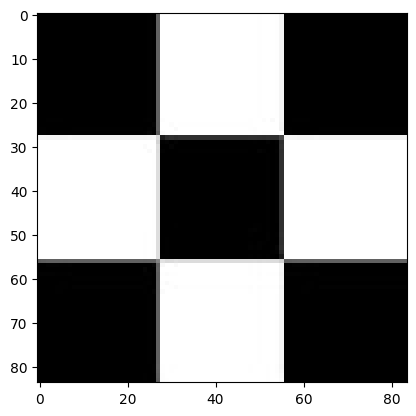

In [18]:
plt.imshow(gray_Scale,cmap="gray")

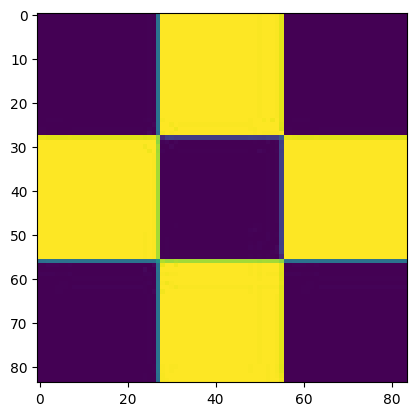

In [19]:
plt.imshow(gray_Scale)

Working with Color Images

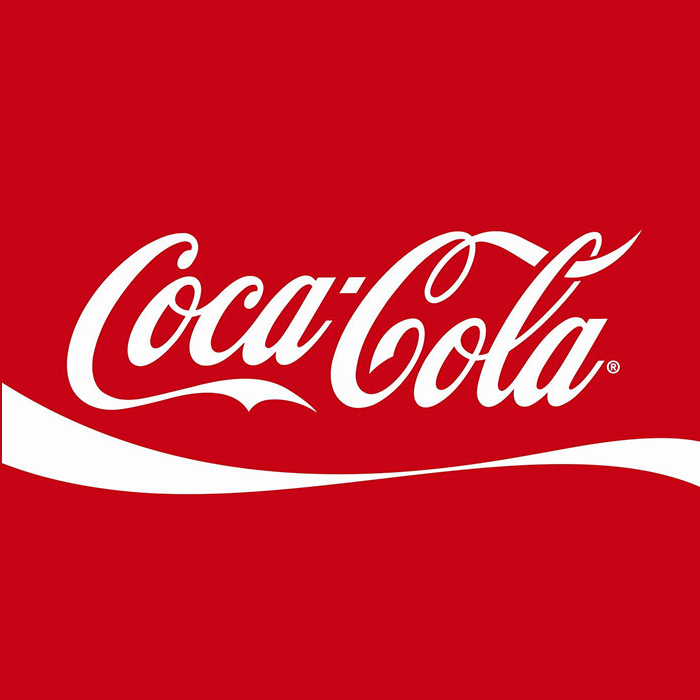

In [20]:
Image(filename="images/color.png")

In [22]:
color = cv2.imread("images/color.png")
print("The shape of image",color.shape)
print("The data-type of image",color.dtype)

The shape of image (700, 700, 3)
The data-type of image uint8


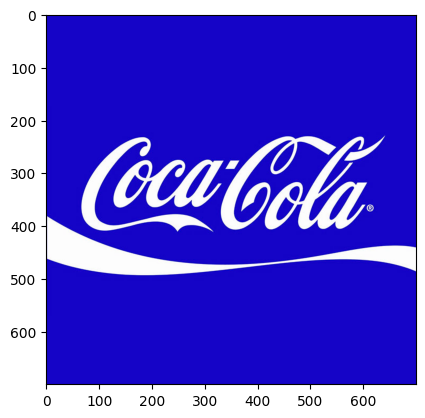

In [23]:
plt.imshow(color)

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

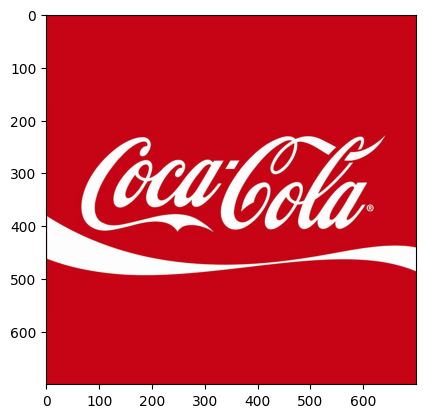

In [24]:
color_Reversed = color[:,:,::-1]
plt.imshow(color_Reversed)

Splitting and Merging Color Channels
- cv2.split() Divides a multi-channel array into several single-channel arrays.

- cv2.merge() Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

Text(0.5, 1.0, 'Merged channel')

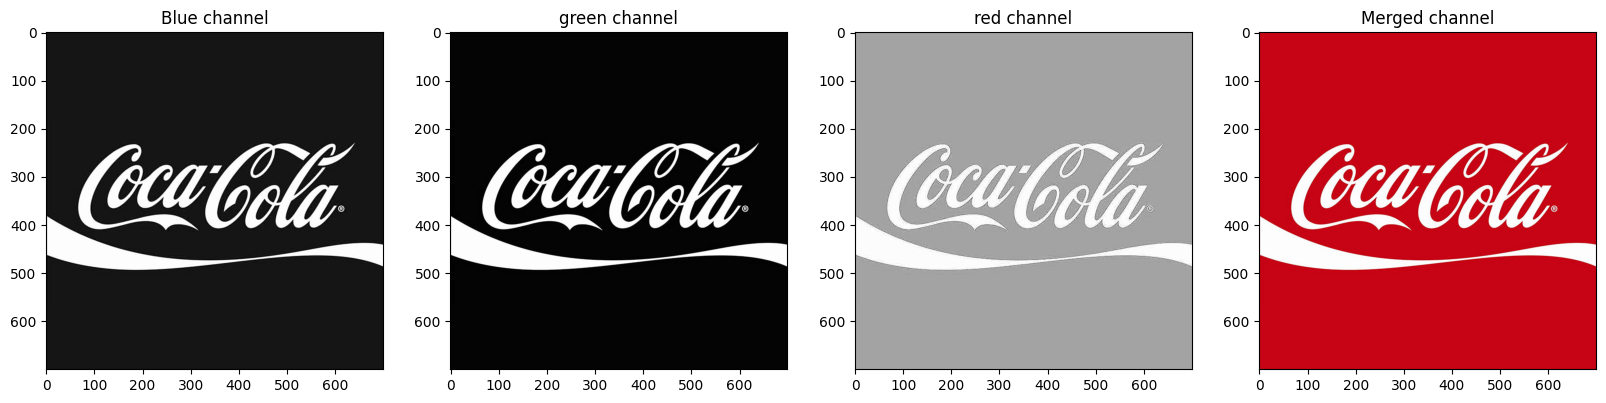

In [30]:
b,g,r = cv2.split(color)
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(b,cmap="gray");plt.title("Blue channel")
plt.subplot(142);plt.imshow(g,cmap="gray");plt.title("green channel")
plt.subplot(143);plt.imshow(r,cmap="gray");plt.title("red channel")

combine = cv2.merge((b,g,r))
plt.subplot(144);plt.imshow(combine[:,:,::-1]);plt.title("Merged channel")

# Converting to different Color Spaces

cv2.cvtColor() Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

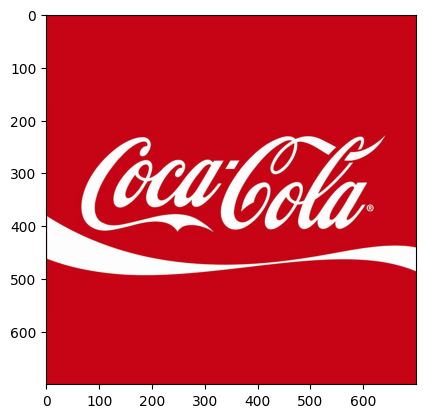

In [32]:
color_rgb = cv2.cvtColor(color,cv2.COLOR_BGR2RGB)
plt.imshow(color_rgb)

# Changing to HSV color space

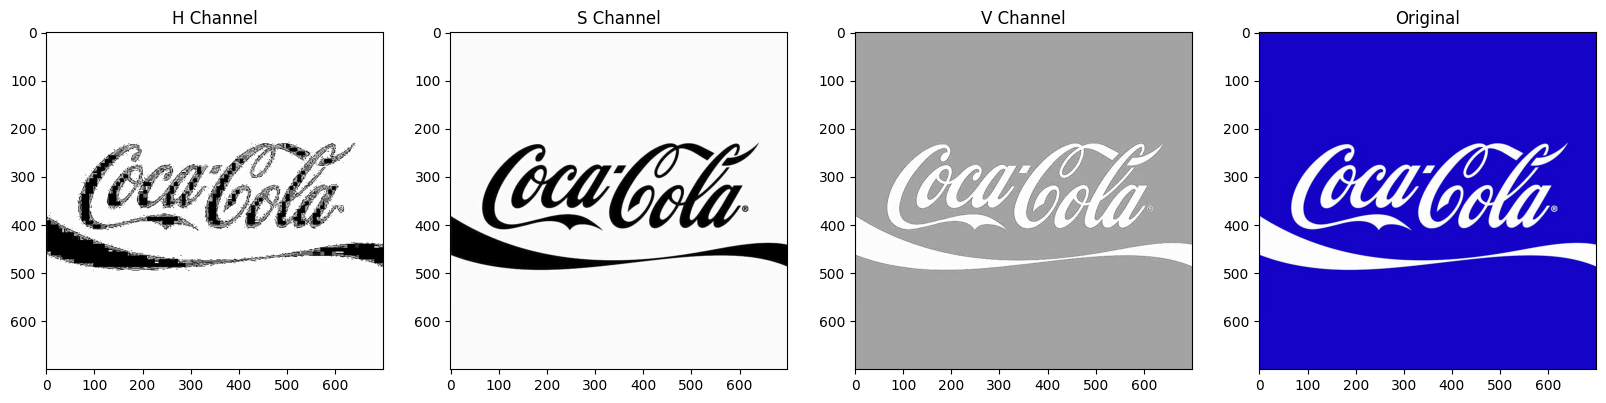

In [34]:
img_hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(color);   plt.title("Original");

# Modifying individual Channel

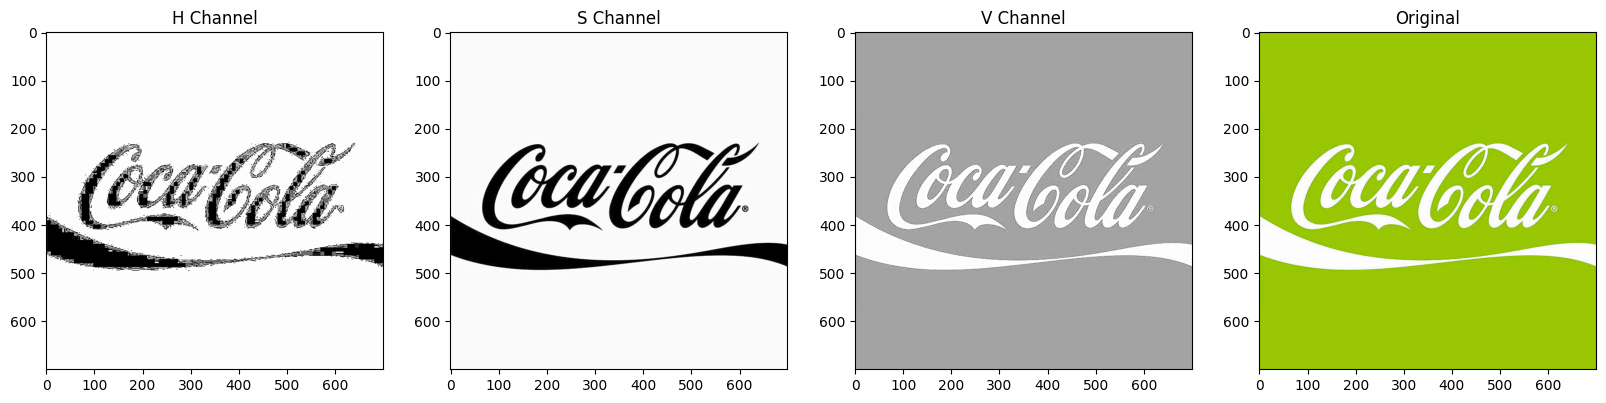

In [35]:
h_new = h + 40
img_NZ_merged = cv2.merge((h_new, s, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

# Saving Images

In [ ]:
# save the image
cv2.imwrite("new_color.png", color)

True

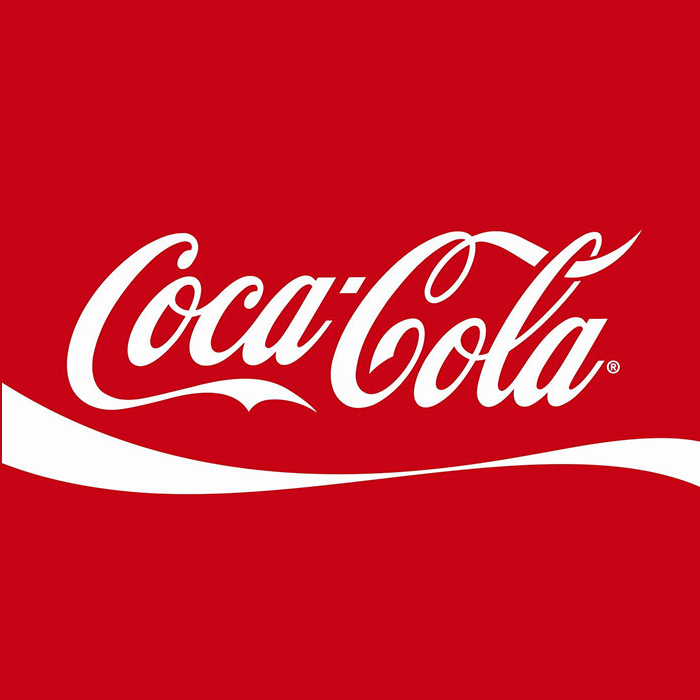

In [38]:
Image(filename="images/color.png")

In [42]:
# read the image as Color
img_NZ_bgr = cv2.imread("images/color.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape (H, W, C) is:", img_NZ_bgr.shape)

# read the image as Grayscaled
img_NZ_gry = cv2.imread("images/color.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape (H, W) is:", img_NZ_gry.shape)

img_NZ_bgr shape (H, W, C) is: (700, 700, 3)
img_NZ_gry shape (H, W) is: (700, 700)
